In [10]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt  

In [11]:
data = pd.read_csv("icc_cwc.csv")
df = pd.read_csv("icc_cwc.csv")

In [12]:
df.head(10)

,Team 1,Score,Overs,RPO,Inns,Result,Opposition,Opposition Score,Opposition Overs,Opposition RPO,Opposition Innings,Ground,Start Date
0,England,334/4,60.0,5.56,1,won,v India,132/3,60.0,2.20,2,Lord's,7-Jun-75
1,New Zealand,309/5,60.0,5.15,1,won,v East Africa,128/8,60.0,2.13,2,Birmingham,7-Jun-75
2,Australia,278/7,60.0,4.63,1,won,v Pakistan,205,53.0,3.86,2,Leeds,7-Jun-75
3,Sri Lanka,86,37.2,2.30,1,lost,v West Indies,87/1,20.4,4.20,2,Manchester,7-Jun-75
4,England,266/6,60.0,4.43,1,won,v New Zealand,186,60.0,3.10,2,Nottingham,11-Jun-75
5,East Africa,120,55.3,2.16,1,lost,v India,123/0,29.5,4.12,2,Leeds,11-Jun-75
6,Australia,328/5,60.0,5.46,1,won,v Sri Lanka,276/4,60.0,4.60,2,The Oval,11-Jun-75
7,Pakistan,266/7,60.0,4.43,1,lost,v West Indies,267/9,59.4,4.47,2,Birmingham,11-Jun-75
8,England,290/5,60.0,4.83,1,won,v East Africa,94,52.3,1.79,2,Birmingham,14-Jun-75
9,India,230,60.0,3.83,1,lost,v New Zealand,233/6,58.5,3.96,2,Manchester,14-Jun-75


In [13]:
df = df.rename(columns={
    'Team 1':'Team',
    'Opposition Score':'Opp. Score',
    'Opposition Overs':'Opp. Overs',
    'Opposition RPO':'Opp. RPO',
    'Opposition Innings':'Opp. Inns',
})

In [14]:
# Remove "v" from rows of Opposition Column
df['Opposition'] = df['Opposition'].str.replace('v ','')

In [15]:
df.head()

,Team,Score,Overs,RPO,Inns,Result,Opposition,Opp. Score,Opp. Overs,Opp. RPO,Opp. Inns,Ground,Start Date
0,England,334/4,60.0,5.56,1,won,India,132/3,60.0,2.20,2,Lord's,7-Jun-75
1,New Zealand,309/5,60.0,5.15,1,won,East Africa,128/8,60.0,2.13,2,Birmingham,7-Jun-75
2,Australia,278/7,60.0,4.63,1,won,Pakistan,205,53.0,3.86,2,Leeds,7-Jun-75
3,Sri Lanka,86,37.2,2.30,1,lost,West Indies,87/1,20.4,4.20,2,Manchester,7-Jun-75
4,England,266/6,60.0,4.43,1,won,New Zealand,186,60.0,3.10,2,Nottingham,11-Jun-75


In [16]:
df

,Team,Score,Overs,RPO,Inns,Result,Opposition,Opp. Score,Opp. Overs,Opp. RPO,Opp. Inns,Ground,Start Date
0,England,334/4,60.0,5.56,1,won,India,132/3,60.0,2.20,2,Lord's,7-Jun-75
1,New Zealand,309/5,60.0,5.15,1,won,East Africa,128/8,60.0,2.13,2,Birmingham,7-Jun-75
2,Australia,278/7,60.0,4.63,1,won,Pakistan,205,53.0,3.86,2,Leeds,7-Jun-75
3,Sri Lanka,86,37.2,2.30,1,lost,West Indies,87/1,20.4,4.20,2,Manchester,7-Jun-75
4,England,266/6,60.0,4.43,1,won,New Zealand,186,60.0,3.10,2,Nottingham,11-Jun-75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,England,337/9,50.0,6.74,1,won,Pakistan,244,43.3,5.60,2,Eden Gardens,11-Nov-23
489,India,410/4,50.0,8.20,1,won,Netherlands,250,47.5,5.22,2,Bengaluru,12-Nov-23
490,India,397/4,50.0,7.94,1,won,New Zealand,327,48.5,6.69,2,Wankhede,15-Nov-23
491,South Africa,212,49.4,4.26,1,lost,Australia,215/7,47.2,4.54,2,Eden Gardens,16-Nov-23


In [17]:
# Check the index of column
df.columns.get_loc("Opp. Inns")

10

In [18]:
# Make Column "Winner" at 11 index with value = 0
df.insert(11,"Winner","")

In [19]:
# Value of each row in Winner Column will be Team value where result = won and Opposition value where result = loss
df.loc[df['Result'] == 'won', 'Winner'] = df[df['Result'] == 'won']['Team']
df.loc[df['Result'] == 'lost', 'Winner'] = df[df['Result'] == 'lost']['Opposition']

In [20]:
df

,Team,Score,Overs,RPO,Inns,Result,Opposition,Opp. Score,Opp. Overs,Opp. RPO,Opp. Inns,Winner,Ground,Start Date
0,England,334/4,60.0,5.56,1,won,India,132/3,60.0,2.20,2,England,Lord's,7-Jun-75
1,New Zealand,309/5,60.0,5.15,1,won,East Africa,128/8,60.0,2.13,2,New Zealand,Birmingham,7-Jun-75
2,Australia,278/7,60.0,4.63,1,won,Pakistan,205,53.0,3.86,2,Australia,Leeds,7-Jun-75
3,Sri Lanka,86,37.2,2.30,1,lost,West Indies,87/1,20.4,4.20,2,West Indies,Manchester,7-Jun-75
4,England,266/6,60.0,4.43,1,won,New Zealand,186,60.0,3.10,2,England,Nottingham,11-Jun-75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,England,337/9,50.0,6.74,1,won,Pakistan,244,43.3,5.60,2,England,Eden Gardens,11-Nov-23
489,India,410/4,50.0,8.20,1,won,Netherlands,250,47.5,5.22,2,India,Bengaluru,12-Nov-23
490,India,397/4,50.0,7.94,1,won,New Zealand,327,48.5,6.69,2,India,Wankhede,15-Nov-23
491,South Africa,212,49.4,4.26,1,lost,Australia,215/7,47.2,4.54,2,Australia,Eden Gardens,16-Nov-23


In [21]:
# check values in Result Column where value = 'n/r
df[df['Result'] == 'n/r'].head(13)

,Team,Score,Overs,RPO,Inns,Result,Opposition,Opp. Score,Opp. Overs,Opp. RPO,Opp. Inns,Winner,Ground,Start Date
91,India,Jan-00,0.2,3.00,1,n/r,Sri Lanka,0,0.0,0.00,2,,Mackay,28-Feb-92
95,Pakistan,74,40.2,1.83,1,n/r,England,24/1,8.0,3.00,2,,Adelaide,1-Mar-92
135,Zimbabwe,45/3,15.5,2.84,1,n/r,Kenya,0,0.0,0.00,2,,Patna,26-Feb-96
190,Zimbabwe,175,49.3,3.53,1,n/r,New Zealand,70/3,15.0,4.66,2,,Leeds,6-Jun-99
214,West Indies,244/9,50.0,4.88,1,n/r,Bangladesh,32/2,8.1,3.91,2,,Benoni,18-Feb-03
238,Pakistan,73/3,14.0,5.21,1,n/r,Zimbabwe,0,0.0,0.00,2,,Bulawayo,4-Mar-03
322,Sri Lanka,146/3,32.5,4.44,1,n/r,Australia,0,0.0,0.00,2,,Colombo (RPS),5-Mar-11
413,South Africa,29/2,7.3,3.86,1,n/r,West Indies,0,0.0,0.00,2,,Southampton,10-Jun-19


In [22]:
#In Result column where value = "n/r" then in Winner column make value = 'n/r'
df.loc[df['Result'] == 'n/r', 'Winner'] = 'n/r'

In [23]:
df[df['Result'] == 'n/r'].head(13)

,Team,Score,Overs,RPO,Inns,Result,Opposition,Opp. Score,Opp. Overs,Opp. RPO,Opp. Inns,Winner,Ground,Start Date
91,India,Jan-00,0.2,3.00,1,n/r,Sri Lanka,0,0.0,0.00,2,n/r,Mackay,28-Feb-92
95,Pakistan,74,40.2,1.83,1,n/r,England,24/1,8.0,3.00,2,n/r,Adelaide,1-Mar-92
135,Zimbabwe,45/3,15.5,2.84,1,n/r,Kenya,0,0.0,0.00,2,n/r,Patna,26-Feb-96
190,Zimbabwe,175,49.3,3.53,1,n/r,New Zealand,70/3,15.0,4.66,2,n/r,Leeds,6-Jun-99
214,West Indies,244/9,50.0,4.88,1,n/r,Bangladesh,32/2,8.1,3.91,2,n/r,Benoni,18-Feb-03
238,Pakistan,73/3,14.0,5.21,1,n/r,Zimbabwe,0,0.0,0.00,2,n/r,Bulawayo,4-Mar-03
322,Sri Lanka,146/3,32.5,4.44,1,n/r,Australia,0,0.0,0.00,2,n/r,Colombo (RPS),5-Mar-11
413,South Africa,29/2,7.3,3.86,1,n/r,West Indies,0,0.0,0.00,2,n/r,Southampton,10-Jun-19


In [24]:
# check if winner column have value = ''
df[df['Winner'] == '']

,Team,Score,Overs,RPO,Inns,Result,Opposition,Opp. Score,Opp. Overs,Opp. RPO,Opp. Inns,Winner,Ground,Start Date
198,Australia,213,49.2,4.31,1,tied,South Africa,213,49.4,4.28,2,,Birmingham,17-Jun-99
237,Sri Lanka,268/9,50.0,5.36,1,tied,South Africa,229/6,45.0,5.08,2,,Durban,3-Mar-03
256,Ireland,221/9,50.0,4.42,1,tied,Zimbabwe,221,50.0,4.42,2,,Kingston,15-Mar-07
313,India,338,49.5,6.78,1,tied,England,338/8,50.0,6.76,2,,Bengaluru,27-Feb-11
444,New Zealand,241/8,50.0,4.82,1,tied,England,241,50.0,4.82,2,,Lord's,14-Jul-19


In [25]:
#In Result column where value = "tied" then in Winner column make value = 'tied'
df.loc[df['Result'] == 'tied', 'Winner'] = 'tied'

In [26]:
df[df['Start Date'] == '14-Jul-19']

,Team,Score,Overs,RPO,Inns,Result,Opposition,Opp. Score,Opp. Overs,Opp. RPO,Opp. Inns,Winner,Ground,Start Date
444,New Zealand,241/8,50.0,4.82,1,tied,England,241,50.0,4.82,2,tied,Lord's,14-Jul-19


In [27]:
# for england vs new zealand 14-Jul-19 make winner equal England due to super over
df.loc[df['Start Date'] == '14-Jul-19', 'Winner'] = 'England'

In [28]:
df[df['Start Date'] == '14-Jul-19']

,Team,Score,Overs,RPO,Inns,Result,Opposition,Opp. Score,Opp. Overs,Opp. RPO,Opp. Inns,Winner,Ground,Start Date
444,New Zealand,241/8,50.0,4.82,1,tied,England,241,50.0,4.82,2,England,Lord's,14-Jul-19


In [29]:
df[df['Score'] == "Jan-00"]

,Team,Score,Overs,RPO,Inns,Result,Opposition,Opp. Score,Opp. Overs,Opp. RPO,Opp. Inns,Winner,Ground,Start Date
91,India,Jan-00,0.2,3.0,1,n/r,Sri Lanka,0,0.0,0.0,2,n/r,Mackay,28-Feb-92


In [30]:
df.loc[df['Start Date'] == '28-Feb-92', 'Score'] = '1/0'

In [31]:
df[df['Start Date'] == '28-Feb-92']

,Team,Score,Overs,RPO,Inns,Result,Opposition,Opp. Score,Opp. Overs,Opp. RPO,Opp. Inns,Winner,Ground,Start Date
91,India,1/0,0.2,3.0,1,n/r,Sri Lanka,0,0.0,0.0,2,n/r,Mackay,28-Feb-92


In [32]:
df.tail(10)

,Team,Score,Overs,RPO,Inns,Result,Opposition,Opp. Score,Opp. Overs,Opp. RPO,Opp. Inns,Winner,Ground,Start Date
483,Afghanistan,291/5,50.0,5.82,1,lost,Australia,293/7,46.5,6.25,2,Australia,Wankhede,7-Nov-23
484,England,339/9,50.0,6.78,1,won,Netherlands,179,37.2,4.79,2,England,Pune,8-Nov-23
485,Sri Lanka,171,46.4,3.66,1,lost,New Zealand,172/5,23.2,7.37,2,New Zealand,Bengaluru,9-Nov-23
486,Afghanistan,244,50.0,4.88,1,lost,South Africa,247/5,47.3,5.20,2,South Africa,Ahmedabad,10-Nov-23
487,Bangladesh,306/8,50.0,6.12,1,lost,Australia,307/2,44.4,6.87,2,Australia,Pune,11-Nov-23
488,England,337/9,50.0,6.74,1,won,Pakistan,244,43.3,5.60,2,England,Eden Gardens,11-Nov-23
489,India,410/4,50.0,8.20,1,won,Netherlands,250,47.5,5.22,2,India,Bengaluru,12-Nov-23
490,India,397/4,50.0,7.94,1,won,New Zealand,327,48.5,6.69,2,India,Wankhede,15-Nov-23
491,South Africa,212,49.4,4.26,1,lost,Australia,215/7,47.2,4.54,2,Australia,Eden Gardens,16-Nov-23
492,India,240,50.0,4.80,1,lost,Australia,241/4,43.0,5.60,2,Australia,Ahmedabad,19-Nov-23


In [33]:
df.dtypes

Team           object
Score          object
Overs         float64
RPO           float64
Inns            int64
Result         object
Opposition     object
Opp. Score     object
Opp. Overs    float64
Opp. RPO      float64
Opp. Inns       int64
Winner         object
Ground         object
Start Date     object
dtype: object

In [34]:
# make new column Team_1_Score with values of Score Column
df.insert(1,"Team_1_Score",df['Score'])

In [35]:
# make new column Team_1_Wickets_Loss with values of Score Column
df.insert(2,"Team_1_Wickets_Loss",df['Score'])

In [36]:
# make new column Team_2_Score with values of Opp. Score Column
df.insert(9,"Team_2_Score",df['Opp. Score'])

In [37]:
# make new column Team_2_Wickets_loss with values of Opp. Score Column
df.insert(10,"Team_2_Wickets_loss",df['Opp. Score'])

In [38]:
# As 'Score' column contains values like '334/4'
# In Team_1_Score Column values will be before '/' of Score column values and In Team_1_Wickets_Loss values will be after '/' of Score column
df[['Team_1_Score', 'Team_1_Wickets_Loss']] = df['Score'].str.split('/', n=1, expand=True)

# If there is no value after "/", set 'Team_1_Wickets_Loss' to 10
df['Team_1_Wickets_Loss'].fillna(10, inplace=True)




In [39]:
# As 'Score' column contains values like '334/4'
# In Team_2_Score Column values will be before '/' of Opp. Score column values and In Team_2_Wickets_Loss values will be after '/' of Opp. Score column
df[['Team_2_Score', 'Team_2_Wickets_loss']] = df['Opp. Score'].str.split('/', n=1, expand=True)

# If there is no value after "/", set 'Wickets_Loss' to 10
df['Team_2_Wickets_loss'].fillna(10, inplace=True)

In [40]:
df.head(10)

,Team,Team_1_Score,Team_1_Wickets_Loss,Score,Overs,RPO,Inns,Result,Opposition,Team_2_Score,Team_2_Wickets_loss,Opp. Score,Opp. Overs,Opp. RPO,Opp. Inns,Winner,Ground,Start Date
0,England,334,4,334/4,60.0,5.56,1,won,India,132,3,132/3,60.0,2.20,2,England,Lord's,7-Jun-75
1,New Zealand,309,5,309/5,60.0,5.15,1,won,East Africa,128,8,128/8,60.0,2.13,2,New Zealand,Birmingham,7-Jun-75
2,Australia,278,7,278/7,60.0,4.63,1,won,Pakistan,205,10,205,53.0,3.86,2,Australia,Leeds,7-Jun-75
3,Sri Lanka,86,10,86,37.2,2.30,1,lost,West Indies,87,1,87/1,20.4,4.20,2,West Indies,Manchester,7-Jun-75
4,England,266,6,266/6,60.0,4.43,1,won,New Zealand,186,10,186,60.0,3.10,2,England,Nottingham,11-Jun-75
5,East Africa,120,10,120,55.3,2.16,1,lost,India,123,0,123/0,29.5,4.12,2,India,Leeds,11-Jun-75
6,Australia,328,5,328/5,60.0,5.46,1,won,Sri Lanka,276,4,276/4,60.0,4.60,2,Australia,The Oval,11-Jun-75
7,Pakistan,266,7,266/7,60.0,4.43,1,lost,West Indies,267,9,267/9,59.4,4.47,2,West Indies,Birmingham,11-Jun-75
8,England,290,5,290/5,60.0,4.83,1,won,East Africa,94,10,94,52.3,1.79,2,England,Birmingham,14-Jun-75
9,India,230,10,230,60.0,3.83,1,lost,New Zealand,233,6,233/6,58.5,3.96,2,New Zealand,Manchester,14-Jun-75


In [41]:
# delete Score column
df = df.drop('Score',axis=1)

In [42]:
# delete Opp. Score Column
df = df.drop('Opp. Score',axis=1)

In [43]:
# As In Start Date Column values are in this format '2-Jan-03' So, make a new column Year with year values of Start Date Column
df['Year'] = pd.to_datetime(df['Start Date'], format='%d-%b-%y').dt.strftime('%y')

In [44]:
df['Year'] = df['Year'].replace('75','1975')
df['Year'] = df['Year'].replace('79','1979')
df['Year'] = df['Year'].replace('83','1983')
df['Year'] = df['Year'].replace('87','1987')
df['Year'] = df['Year'].replace('92','1992')
df['Year'] = df['Year'].replace('96','1996')
df['Year'] = df['Year'].replace('99','1999')
df['Year'] = df['Year'].replace('03','2003')
df['Year'] = df['Year'].replace('07','2007')
df['Year'] = df['Year'].replace('11','2011')
df['Year'] = df['Year'].replace('15','2015')
df['Year'] = df['Year'].replace('19','2019')
df['Year'] = df['Year'].replace('23','2023')

In [45]:
# Rename all column
df = df.rename(columns={
    'Team':'Team 1',
    'Team_1_Score':'Team 1 Score',
    'Team_1_Wickets_Loss':'Team 1 Wickets Loss',
    'Overs':'Team 1 Overs',
    'RPO':'Team 1 RPO',
    'Inns':'Team 1 Inns',
    'Opposition':'Team 2',
    'Team_2_Score':'Team 2 Score',
    'Team_2_Wickets_loss':'Team 2 Wickets Loss',
    'Opp. Overs':'Team 2 Overs',
    'Opp. RPO':'Team 2 RPO',
    'Opp. Inns':'Team 2 Inns'
})

Description of all columns

- **Team 1:** The name of the Batting First Team

- **Team 1 Score:** The total score of the Batting First Team

- **Team 1 Wickets Loss:** The total wickets loss of the Batting First Team

- **Team 1 Overs:** The total number of overs played by the Batting First Team

- **Team 1 RPO (Runs Per Over):** The run rate per over for the Batting First Team

- **Team 1 Inns (Innings):** The innings of the Batting First Team

- **Result:** The result of the match for the Batting First Team

- **Team 2:** The name of the Batting Second Team

- **Team 2 Score:** The total score of the Batting Second Team

- **Team 2 Overs:** The total number of overs played by the Batting Second Team

- **Team 2 RPO (Runs Per Over):** The run rate per over for the Batting Second Team

- **Team 2 Inns (Innings):** The innings of the Batting Second Team

- **Ground:** The venue or ground where the match took place

- **Start Date:** The date on which the match started

- **Year:** The Year on which the match played

In [46]:
df.head(10)

,Team 1,Team 1 Score,Team 1 Wickets Loss,Team 1 Overs,Team 1 RPO,Team 1 Inns,Result,Team 2,Team 2 Score,Team 2 Wickets Loss,Team 2 Overs,Team 2 RPO,Team 2 Inns,Winner,Ground,Start Date,Year
0,England,334,4,60.0,5.56,1,won,India,132,3,60.0,2.20,2,England,Lord's,7-Jun-75,1975
1,New Zealand,309,5,60.0,5.15,1,won,East Africa,128,8,60.0,2.13,2,New Zealand,Birmingham,7-Jun-75,1975
2,Australia,278,7,60.0,4.63,1,won,Pakistan,205,10,53.0,3.86,2,Australia,Leeds,7-Jun-75,1975
3,Sri Lanka,86,10,37.2,2.30,1,lost,West Indies,87,1,20.4,4.20,2,West Indies,Manchester,7-Jun-75,1975
4,England,266,6,60.0,4.43,1,won,New Zealand,186,10,60.0,3.10,2,England,Nottingham,11-Jun-75,1975
5,East Africa,120,10,55.3,2.16,1,lost,India,123,0,29.5,4.12,2,India,Leeds,11-Jun-75,1975
6,Australia,328,5,60.0,5.46,1,won,Sri Lanka,276,4,60.0,4.60,2,Australia,The Oval,11-Jun-75,1975
7,Pakistan,266,7,60.0,4.43,1,lost,West Indies,267,9,59.4,4.47,2,West Indies,Birmingham,11-Jun-75,1975
8,England,290,5,60.0,4.83,1,won,East Africa,94,10,52.3,1.79,2,England,Birmingham,14-Jun-75,1975
9,India,230,10,60.0,3.83,1,lost,New Zealand,233,6,58.5,3.96,2,New Zealand,Manchester,14-Jun-75,1975


In [47]:
# check in Result column if value = 'n/r'
df[df['Result']=='n/r'].head(20)

,Team 1,Team 1 Score,Team 1 Wickets Loss,Team 1 Overs,Team 1 RPO,Team 1 Inns,Result,Team 2,Team 2 Score,Team 2 Wickets Loss,Team 2 Overs,Team 2 RPO,Team 2 Inns,Winner,Ground,Start Date,Year
91,India,1,0,0.2,3.00,1,n/r,Sri Lanka,0,10,0.0,0.00,2,n/r,Mackay,28-Feb-92,1992
95,Pakistan,74,10,40.2,1.83,1,n/r,England,24,1,8.0,3.00,2,n/r,Adelaide,1-Mar-92,1992
135,Zimbabwe,45,3,15.5,2.84,1,n/r,Kenya,0,10,0.0,0.00,2,n/r,Patna,26-Feb-96,1996
190,Zimbabwe,175,10,49.3,3.53,1,n/r,New Zealand,70,3,15.0,4.66,2,n/r,Leeds,6-Jun-99,1999
214,West Indies,244,9,50.0,4.88,1,n/r,Bangladesh,32,2,8.1,3.91,2,n/r,Benoni,18-Feb-03,2003
238,Pakistan,73,3,14.0,5.21,1,n/r,Zimbabwe,0,10,0.0,0.00,2,n/r,Bulawayo,4-Mar-03,2003
322,Sri Lanka,146,3,32.5,4.44,1,n/r,Australia,0,10,0.0,0.00,2,n/r,Colombo (RPS),5-Mar-11,2011
413,South Africa,29,2,7.3,3.86,1,n/r,West Indies,0,10,0.0,0.00,2,n/r,Southampton,10-Jun-19,2019


In [48]:
# delete values in Result Column where value = 'n/r'
df.drop(df[df['Result'] == 'n/r'].index, inplace=True)

In [49]:
# check if any value = 'n/r' in Result column
df[df['Result']=='n/r'].head()

,Team 1,Team 1 Score,Team 1 Wickets Loss,Team 1 Overs,Team 1 RPO,Team 1 Inns,Result,Team 2,Team 2 Score,Team 2 Wickets Loss,Team 2 Overs,Team 2 RPO,Team 2 Inns,Winner,Ground,Start Date,Year


In [50]:
df['Result'].unique()

array(['won', 'lost', 'tied'], dtype=object)

In [51]:
df.head(10)

,Team 1,Team 1 Score,Team 1 Wickets Loss,Team 1 Overs,Team 1 RPO,Team 1 Inns,Result,Team 2,Team 2 Score,Team 2 Wickets Loss,Team 2 Overs,Team 2 RPO,Team 2 Inns,Winner,Ground,Start Date,Year
0,England,334,4,60.0,5.56,1,won,India,132,3,60.0,2.20,2,England,Lord's,7-Jun-75,1975
1,New Zealand,309,5,60.0,5.15,1,won,East Africa,128,8,60.0,2.13,2,New Zealand,Birmingham,7-Jun-75,1975
2,Australia,278,7,60.0,4.63,1,won,Pakistan,205,10,53.0,3.86,2,Australia,Leeds,7-Jun-75,1975
3,Sri Lanka,86,10,37.2,2.30,1,lost,West Indies,87,1,20.4,4.20,2,West Indies,Manchester,7-Jun-75,1975
4,England,266,6,60.0,4.43,1,won,New Zealand,186,10,60.0,3.10,2,England,Nottingham,11-Jun-75,1975
5,East Africa,120,10,55.3,2.16,1,lost,India,123,0,29.5,4.12,2,India,Leeds,11-Jun-75,1975
6,Australia,328,5,60.0,5.46,1,won,Sri Lanka,276,4,60.0,4.60,2,Australia,The Oval,11-Jun-75,1975
7,Pakistan,266,7,60.0,4.43,1,lost,West Indies,267,9,59.4,4.47,2,West Indies,Birmingham,11-Jun-75,1975
8,England,290,5,60.0,4.83,1,won,East Africa,94,10,52.3,1.79,2,England,Birmingham,14-Jun-75,1975
9,India,230,10,60.0,3.83,1,lost,New Zealand,233,6,58.5,3.96,2,New Zealand,Manchester,14-Jun-75,1975


In [52]:
df.shape

(485, 17)

In [53]:
df['Team 1 Score'] = df['Team 1 Score'].astype('int64')
df['Team 1 Wickets Loss'] = df['Team 1 Wickets Loss'].astype('int64')
df['Team 2 Score'] = df['Team 2 Score'].astype('int64')
df['Team 2 Wickets Loss'] = df['Team 2 Wickets Loss'].astype('int64')

In [54]:
df.dtypes

Team 1                  object
Team 1 Score             int64
Team 1 Wickets Loss      int64
Team 1 Overs           float64
Team 1 RPO             float64
Team 1 Inns              int64
Result                  object
Team 2                  object
Team 2 Score             int64
Team 2 Wickets Loss      int64
Team 2 Overs           float64
Team 2 RPO             float64
Team 2 Inns              int64
Winner                  object
Ground                  object
Start Date              object
Year                    object
dtype: object

<Axes: >

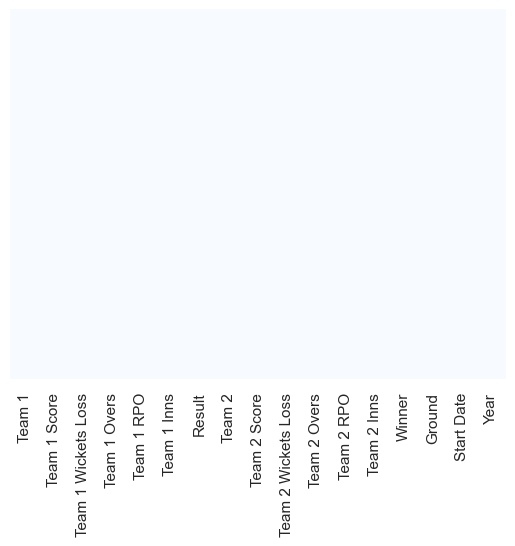

In [55]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False,cmap='Blues')

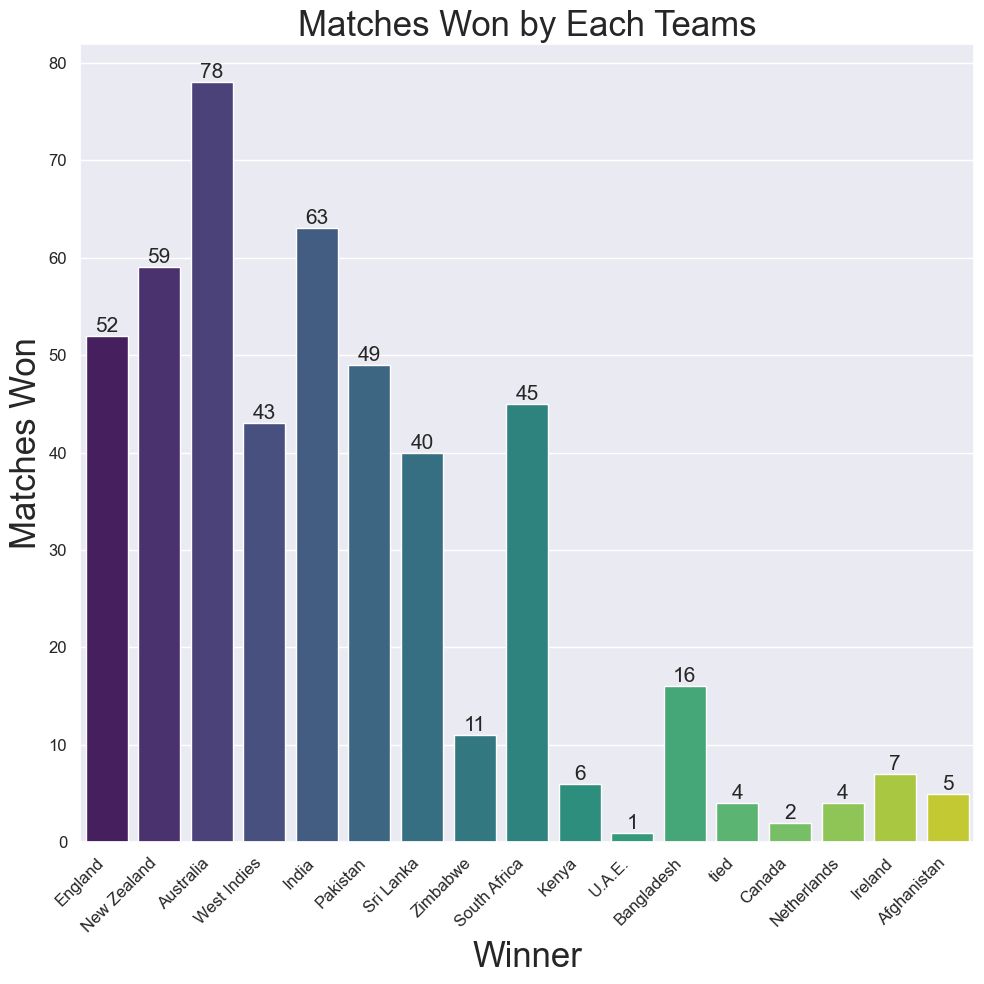

In [56]:
plt.figure(figsize=(10,10))


ax = sns.countplot(x='Winner', data=df, palette='viridis', legend=False, hue='Winner')
plt.title("Matches Won by Each Teams", fontdict={'fontsize':25})
plt.ylabel("Matches Won", fontdict={'fontsize':25})
plt.xlabel("Winner", fontdict={'fontsize':25})

for container in ax.containers:
    ax.bar_label(container,fontsize = 15)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()

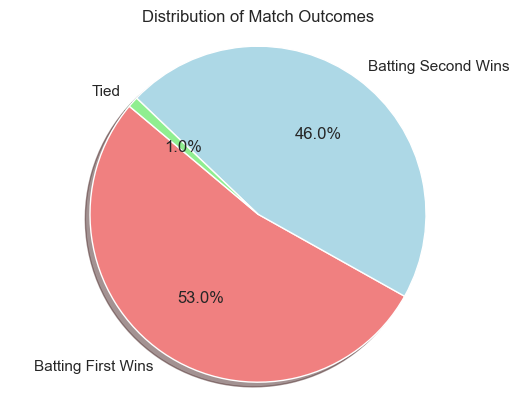

In [57]:
team_1 = df['Team 1']
team_1_wins = team_1[df['Result'] == 'won'].count()

team_2 = df['Team 2']
team_2_wins = team_2[df['Result'] == 'lost'].count()

team_1 = df['Team 1']
tied = team_1[df['Result'] == 'tied'].count()

labels = ['Batting First Wins', 'Batting Second Wins', 'Tied']
sizes = [team_1_wins,team_2_wins, tied]
colors = ['lightcoral', 'lightblue', 'lightgreen']


plt.pie(sizes, labels=labels,colors=colors,autopct='%1.1f%%',shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribution of Match Outcomes')
plt.show()

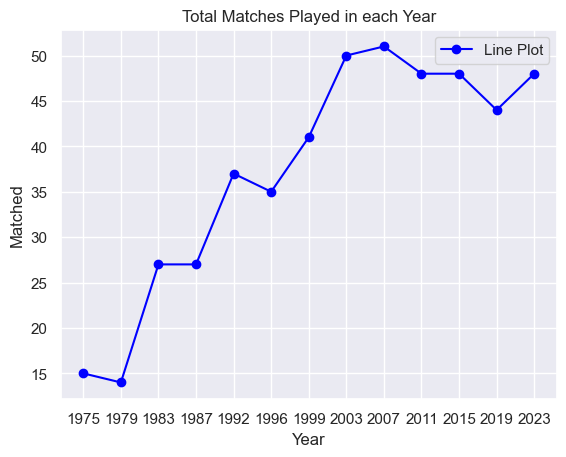

In [58]:

# Sample data
matches_year = df['Year'].value_counts().sort_index()
x_values = matches_year.index
y_values = matches_year.values
# Plotting the line
plt.plot(x_values,y_values,  marker='o',linestyle='-', color='blue', label='Line Plot')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Matched')
plt.title('Total Matches Played in each Year')

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

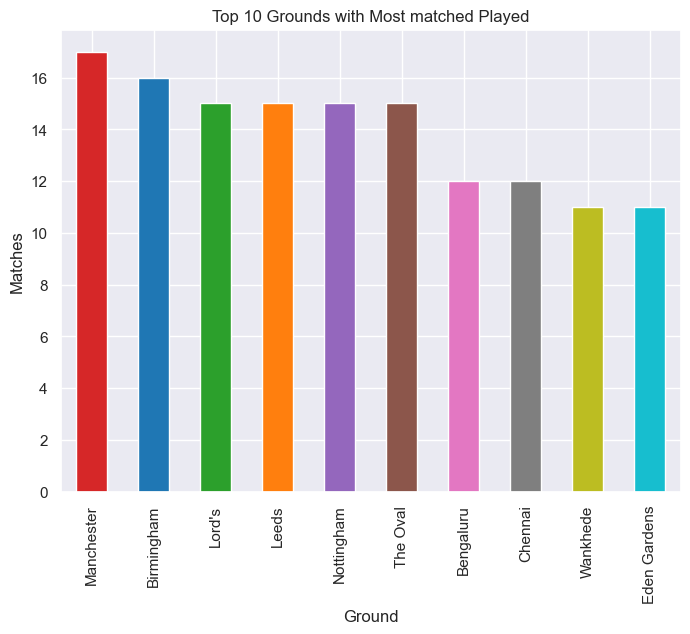

In [59]:
plt.figure(figsize=(8,6))

ground_count = df['Ground'].value_counts().nlargest(10)
bar_colors = bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
plt.title("Top 10 Grounds with Most matched Played")
plt.ylabel("Matches")

ground_count.plot(kind='bar', color =bar_colors)

plt.show()


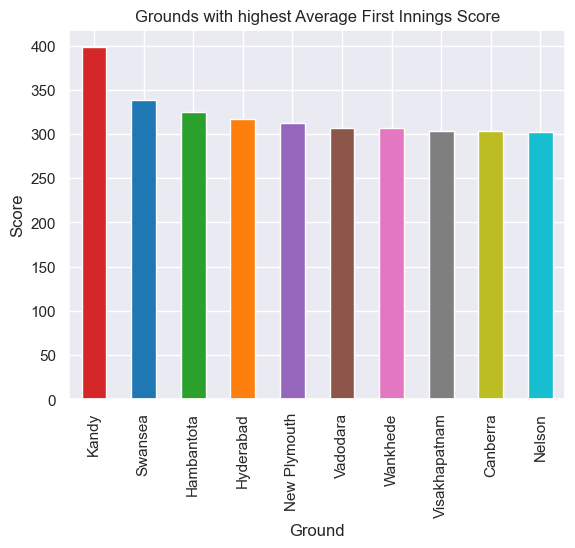

In [60]:
average_score = df.groupby(['Ground'])['Team 1 Score'].mean()
m = average_score.sort_values(ascending=False).head(10)
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

m.plot(kind='bar',color=bar_colors)
plt.title("Grounds with highest Average First Innings Score")
plt.ylabel("Score")
plt.show()

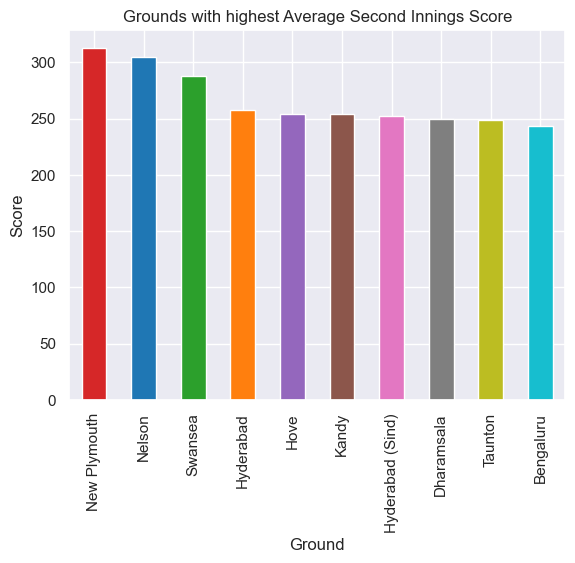

In [61]:
average_score = df.groupby(['Ground'])['Team 2 Score'].mean()
m = average_score.sort_values(ascending=False).head(10)
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

m.plot(kind='bar',color=bar_colors)
plt.title("Grounds with highest Average Second Innings Score")
plt.ylabel("Score")
plt.show()

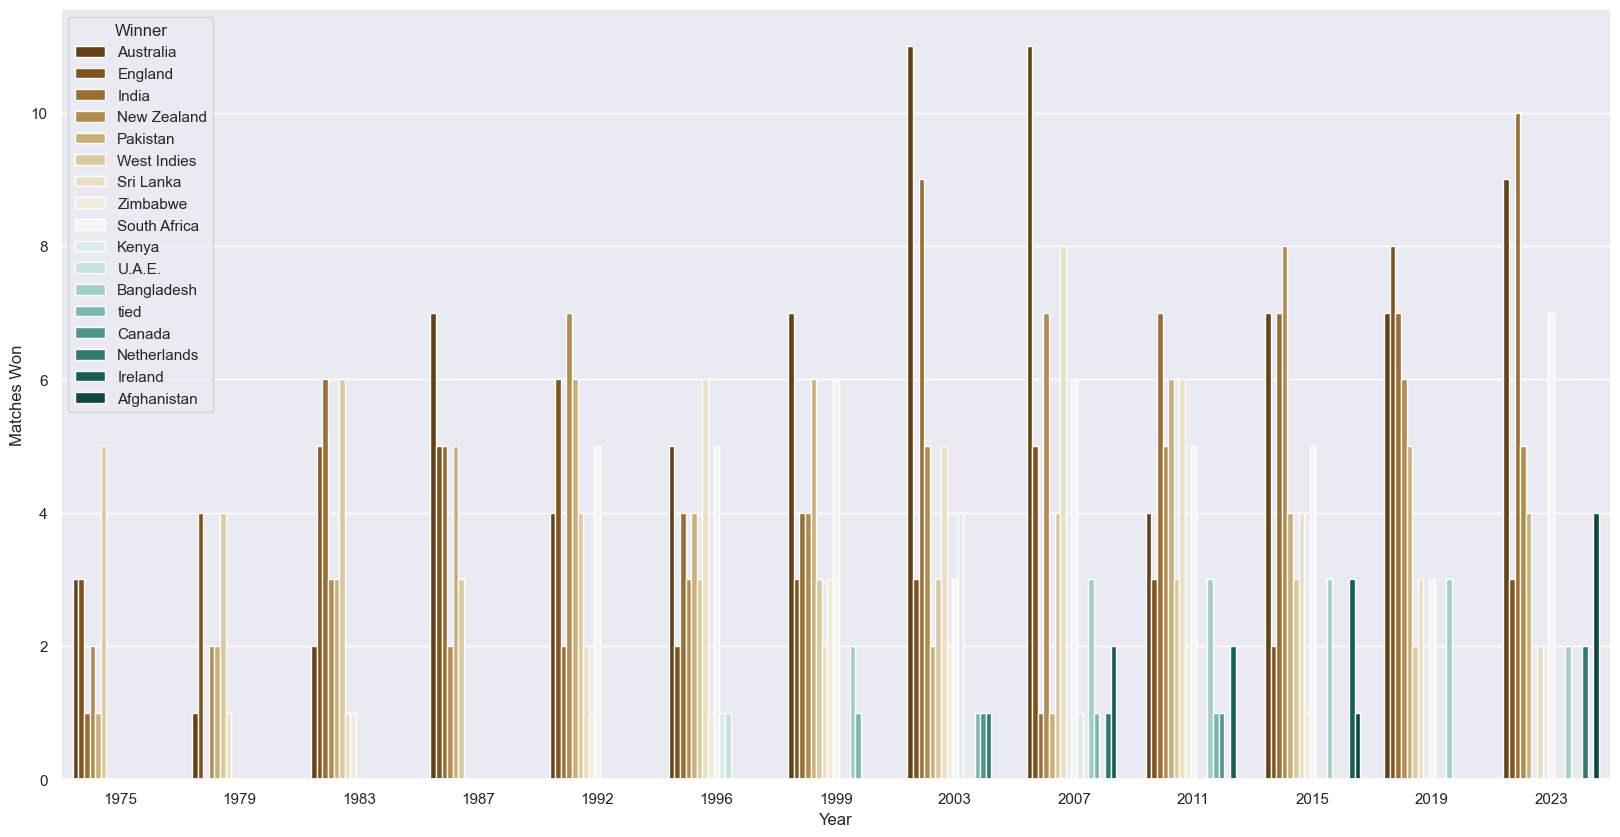

In [62]:
#Matches won by teams ech year
matches_won = df.groupby(['Year','Winner']).size().reset_index(name='Matches Won')
colors = sns.color_palette('BrBG',17)
plt.figure(figsize=(20,10))
sns.barplot(x='Year',y='Matches Won',hue='Winner',data=matches_won,palette=colors)
plt.show()

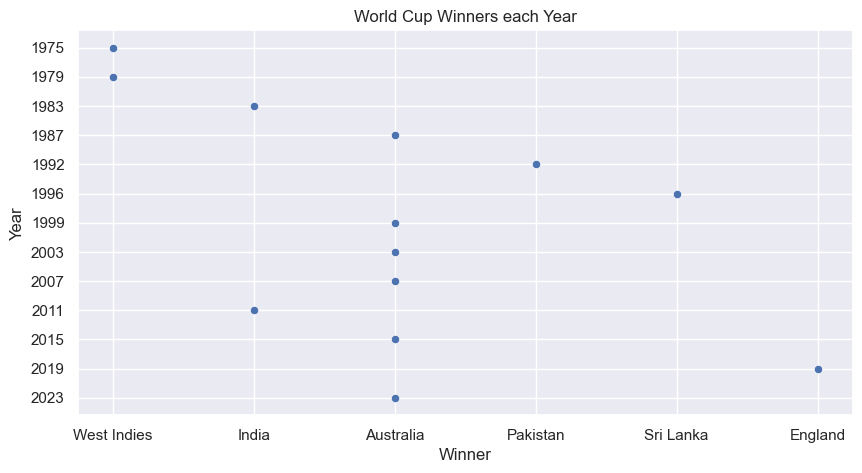

In [63]:
years = df.groupby('Year').tail(1)
plt.figure(figsize=(10,5))
sns.scatterplot(x='Winner',y='Year',data=years)
plt.title("World Cup Winners each Year")
plt.show()